<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-libraries-and-load-the-data" data-toc-modified-id="Import-libraries-and-load-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries and load the data</a></span><ul class="toc-item"><li><span><a href="#Train-and-Test-Splits" data-toc-modified-id="Train-and-Test-Splits-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Train and Test Splits</a></span></li><li><span><a href="#1.2-Scaler" data-toc-modified-id="1.2-Scaler-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>1.2 Scaler</a></span></li></ul></li><li><span><a href="#2.-Modeling" data-toc-modified-id="2.-Modeling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. Modeling</a></span><ul class="toc-item"><li><span><a href="#Dummy-regressor" data-toc-modified-id="Dummy-regressor-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Dummy regressor</a></span></li><li><span><a href="#OLS-regressor" data-toc-modified-id="OLS-regressor-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>OLS regressor</a></span><ul class="toc-item"><li><span><a href="#Make-predictions-on-both-train-and-test-splits" data-toc-modified-id="Make-predictions-on-both-train-and-test-splits-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Make predictions on both train and test splits</a></span></li><li><span><a href="#Assess-the-model-performance" data-toc-modified-id="Assess-the-model-performance-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Assess the model performance</a></span></li><li><span><a href="#Hyperparameter-search-using-random-GridSearchCV" data-toc-modified-id="Hyperparameter-search-using-random-GridSearchCV-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Hyperparameter search using random GridSearchCV</a></span></li></ul></li><li><span><a href="#Random-forest-regressor" data-toc-modified-id="Random-forest-regressor-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Random forest regressor</a></span></li><li><span><a href="#Data-Quantity-Assessment" data-toc-modified-id="Data-Quantity-Assessment-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Data Quantity Assessment</a></span></li><li><span><a href="#Save-Final-Model" data-toc-modified-id="Save-Final-Model-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Save Final Model</a></span></li></ul></li><li><span><a href="#Summary-and-further-analysis" data-toc-modified-id="Summary-and-further-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Summary and further analysis</a></span></li></ul></div>

## Import libraries and load the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression

from sklearn import __version__ as sklearn_version
from library.sb_utils import save_file
%matplotlib inline

sns.set_style('whitegrid') 
# plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./Data/all_sales_summary.csv')
df.head()

,State,avg_sales_state,avg_profit_state,avg_discount_state,avg_wating_days_state,Same_day_ratio,First Class_ratio,Second Class_ratio,Standard Class_ratio,Consumer_ratio,Corporate_ratio,Home_Office_ratio,Furniture_ratio,Office_Supplies_ratio,Technology_ratio
0,Alabama,66.611429,14.281307,0.000000,4.261905,0.116445,0.416064,0.215359,0.252132,0.256243,0.460118,0.283639,0.429349,0.215643,0.355008
1,Arizona,66.156417,5.874764,0.282143,4.130952,0.254247,0.248846,0.295348,0.201559,0.254331,0.373099,0.372570,0.418223,0.131438,0.450339
2,Arkansas,48.697368,12.927255,0.000000,4.184211,0.053466,0.216560,0.484328,0.245646,0.290320,0.461725,0.247956,0.568611,0.212633,0.218756
3,California,74.152678,12.952794,0.065100,3.878159,0.236860,0.243677,0.254673,0.264791,0.358729,0.370454,0.270817,0.430691,0.136498,0.432811
4,Colorado,54.639008,3.092148,0.294697,3.704545,0.290164,0.305009,0.179276,0.225550,0.365419,0.354759,0.279823,0.289397,0.139808,0.570795


In [3]:
print(df.shape)
df.info()
df.columns

(48, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   State                  48 non-null     object 
 1   avg_sales_state        48 non-null     float64
 2   avg_profit_state       48 non-null     float64
 3   avg_discount_state     48 non-null     float64
 4   avg_wating_days_state  48 non-null     float64
 5   Same_day_ratio         48 non-null     float64
 6   First Class_ratio      48 non-null     float64
 7   Second Class_ratio     48 non-null     float64
 8   Standard Class_ratio   48 non-null     float64
 9   Consumer_ratio         48 non-null     float64
 10  Corporate_ratio        48 non-null     float64
 11  Home_Office_ratio      48 non-null     float64
 12  Furniture_ratio        48 non-null     float64
 13  Office_Supplies_ratio  48 non-null     float64
 14  Technology_ratio       48 non-null     float64
dtyp

Index(['State', 'avg_sales_state', 'avg_profit_state', 'avg_discount_state',
       'avg_wating_days_state', 'Same_day_ratio', 'First Class_ratio',
       'Second Class_ratio', 'Standard Class_ratio', 'Consumer_ratio',
       'Corporate_ratio', 'Home_Office_ratio', 'Furniture_ratio',
       'Office_Supplies_ratio', 'Technology_ratio'],
      dtype='object')

### Train and Test Splits

In order to fit the models on the data, I first define the ‘X’ variable (independent variable) and the ‘Y’ variable (dependent variable). After defining the variables, split the data into a train set and test set using the ‘train_test_split’ function by scikit-learn. 

In [4]:
# to avoid multi-colinearity, drop columns 'Same_day_ratio', 'Consumer_ratio','Furniture_ratio'
Target = ['avg_profit_state']
Features = ['avg_sales_state',  'avg_discount_state',
       'avg_wating_days_state', 'First Class_ratio',
       'Second Class_ratio', 'Standard Class_ratio', 
       'Corporate_ratio', 'Home_Office_ratio', 
       'Office_Supplies_ratio', 'Technology_ratio']
X = df[Features]
y = df[Target]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  
print(X_train.shape, X_test.shape)
train_columns = X_train.columns

(33, 10) (15, 10)


In [6]:
train_columns

Index(['avg_sales_state', 'avg_discount_state', 'avg_wating_days_state',
       'First Class_ratio', 'Second Class_ratio', 'Standard Class_ratio',
       'Corporate_ratio', 'Home_Office_ratio', 'Office_Supplies_ratio',
       'Technology_ratio'],
      dtype='object')

### 1.2 Scaler

In [7]:
#Call StandardScaler method on `X_tr` to fit the scaler;
# use `transform()` method to apply the scaling to both the train and test split.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 2. Modeling

To build and train five different types of linear regression models:
    - OLS model
    - Lasso regression model
    - Ridge regression model
    - Elastic Net regression model
    - Random forest regression model
    
    The linear regression model assumes a linear relationship between the input and output variables. If this relationship is present, we use Pearson correlation coefficients to measure the direction and strength of the linear relationship between two variables, and use evaluation metrics such as mean square error to measure the predictive power of the linear regression model. 

### Dummy regressor

In [8]:
train_mean = y_train.mean()
train_mean

avg_profit_state    12.822677
dtype: float64

In [9]:
# Fit the skilearn dummy regressor on the training data
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[12.82267725]])

### Linear regression

In [10]:
# Create the model
Model_1 = linear_model.LinearRegression() 
lm = LinearRegression().fit(X_train, y_train)

#### Make predictions on both train and test splits

In [11]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

#### Assess the model performance

R^2 is a common metric, and interpretable in terms of the amount of variance explained, it's less appealing if you want an idea of how "close" your predictions are to the true values.
Metrics that summarize the difference between predicted and actual values are _mean absolute error_ and _mean squared error_.

In [12]:
# r2
lm_r2_score = r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)
lm_r2_score

(0.9080984945455154, 0.8318443434283349)

 - 𝑅2  tells us how much of the variance we're explaining beyond that of using the mean. we see that the simple linear regression model explains over 91% of the variance on the train set and over 83% on the test set.

In [13]:
# mae
lm_mae = mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred)
lm_mae

(0.9561436603928959, 1.406043040754563)

- On average we expect to estimate a profit within \\$0.96 to \\$1.4 of the real price. This is much, much better than the \\$12 from just guessing using the average.

In [14]:
# rmse
lm_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_test_pred))
lm_rmse

(1.4132335138381698, 2.0622606798963523)

#### Hyperparameter search using random GridSearchCV

In [15]:
pipe = make_pipeline(    
    StandardScaler(), # SimpleImputer(strategy='median'), 
    SelectKBest(f_regression),
    LinearRegression()
)

In [16]:
pipe = make_pipeline(    
    StandardScaler(), # SimpleImputer(strategy='median'), 
    SelectKBest(f_regression),
    LinearRegression()
)

In [17]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [18]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x00000179A6C82D38>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [19]:
lr_grid_cv.cv_results_

{'mean_fit_time': array([0.0392611 , 0.03921137, 0.01741772, 0.00859871, 0.00717869,
        0.00766444, 0.00592504, 0.0061512 , 0.00536337, 0.00588336]),
 'std_fit_time': array([0.01714401, 0.02463528, 0.00389907, 0.00050412, 0.00073332,
        0.00119919, 0.00071005, 0.00178873, 0.00046223, 0.00084443]),
 'mean_score_time': array([0.00297723, 0.0028172 , 0.00774202, 0.00316796, 0.00210071,
        0.00216718, 0.00233345, 0.00206523, 0.00159488, 0.00136428]),
 'std_score_time': array([2.88971186e-05, 4.12477879e-04, 8.14806430e-03, 9.57634364e-04,
        7.10711444e-04, 3.28483057e-04, 4.20983413e-04, 3.51701764e-04,
        4.88500681e-04, 5.44651626e-04]),
 'param_selectkbest__k': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'selectkbest__k': 1},
  {'selectkbest__k': 2},
  {'selectkbest__k': 3},
  {'se

In [20]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_best_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [21]:
lr_grid_cv.best_params_

{'selectkbest__k': 1}

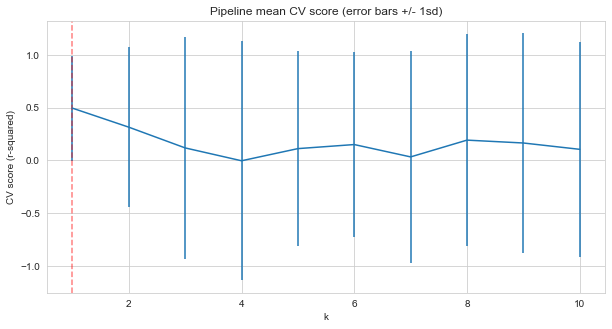

In [22]:
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_best_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [23]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()
selected

array([False,  True, False, False, False, False, False, False, False,
       False])

In [24]:
features = train_columns[selected]

In [25]:
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
coefs

array([[-4.15216319]])

In [26]:
pd.Series(coefs[0], index=features)

avg_discount_state   -4.152163
dtype: float64

In [45]:
pipe_new = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression, k=1),
    LinearRegression()
)

In [46]:
pipe_new.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=1,
                             score_func=<function f_regression at 0x00000179A6C82D38>)),
                ('linearregression', LinearRegression())])

In [47]:
y_tr_pred = pipe_new.predict(X_train)
y_te_pred = pipe_new.predict(X_test)

In [48]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.7933112208349455, 0.8701692839028163)

In [49]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(1.5550534112056853, 1.3724914622315285)

### Random forest regressor

In [32]:
# pipeline
rf_pipe = make_pipeline(   
    StandardScaler(), #SimpleImputer(strategy='median'),
    RandomForestRegressor(random_state=42)
)

In [36]:
rf_cv_results = cross_validate(rf_pipe, X_train, y_train, cv=5)
rf_cv_results

{'fit_time': array([0.14576173, 0.07994628, 0.07692432, 0.07670307, 0.0799334 ]),
 'score_time': array([0.00897026, 0.00598407, 0.00594425, 0.00595093, 0.00597882]),
 'test_score': array([ 0.41286212,  0.67123477,  0.89569581,  0.79267699, -0.15046356])}

In [44]:
np.mean(rf_cv_results['test_score']), np.std(rf_cv_results['test_score'])

(0.524401223895922, 0.37397195013054757)

### Data Quantity Assessment

In [28]:
# Would more data be useful?  Assess this trade off by seeing how performance varies with differing data set sizes.
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(RF_pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

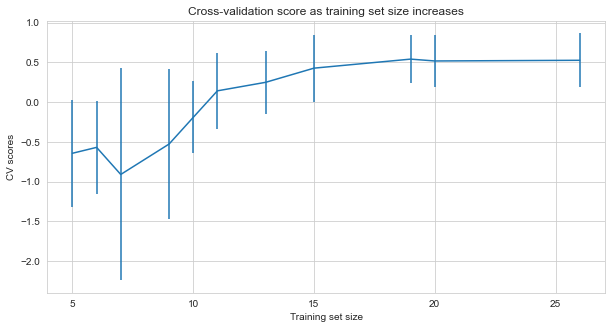

In [29]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');

There's an initial rapid improvement in model scores as one would expect, but it's essentially levelled off by around a sample size of 500-600.  This shows that we seem to have plenty of data. 

### Save Final Model

In [30]:
final_model = rf_grid_cv.best_estimator_
final_model.version = '1.0'
final_model.pandas_version = pd.__version__
final_model.numpy_version = np.__version__
final_model.sklearn_version = sklearn_version
final_model.build_datetime = datetime.datetime.now()

# save the model

modelpath = '../models'
save_file(final_model, 'customer_analysis_model.pkl', modelpath)

NameError: name 'rf_grid_cv' is not defined

## Summary and further analysis

- To solve this binary classification problem, I trained 5 different supervised machine learning models. After comparing and evaluating the model performance, the final random forest model is selected and applied to predict customers' response to the last marketing champaign. 
- The final random forest model has the average accuracy of 0.88 and a strong roc_auc of 0.85, which is consistent with cross validation roc of 0.83. The random forest model is fast to train, easy to tune and not prone to overfitting.
- The analysis of customers' family structures, income and spending behaviors can help business better plan marketing strategies, boost new customer enrollment and potentially increase revenue. Further analysis which features contribute most to customers' total expenses may generate more insights from the data.